# **Library Import**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import glob, random
import keras, os, sys
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import imageio
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from PIL import Image

from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename



from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool2D, Dense, Flatten, Layer, Input, Dropout
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = True
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import initializers, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input

In [3]:
exoTrain = glob.glob("/content/drive/MyDrive/exoplanet/Data/trainingData/ConfirmedExoplanets/*.png")
print ("Total of %d  images." % len(exoTrain))
print ('the filenames:\n')
print("\n".join(exoTrain[:5]))

Total of 15  images.
the filenames:

/content/drive/MyDrive/exoplanet/Data/trainingData/ConfirmedExoplanets/kplr010874614-2009131105131_llc1655377738.png
/content/drive/MyDrive/exoplanet/Data/trainingData/ConfirmedExoplanets/kplr010874614-2009350155506_llc1655377738.png
/content/drive/MyDrive/exoplanet/Data/trainingData/ConfirmedExoplanets/kplr010874614-2009166043257_llc1655377738.png
/content/drive/MyDrive/exoplanet/Data/trainingData/ConfirmedExoplanets/kplr010874614-2009259160929_llc1655377738.png
/content/drive/MyDrive/exoplanet/Data/trainingData/ConfirmedExoplanets/kplr010874614-2010078095331_llc1655377739.png


In [4]:
epTest = glob.glob("/content/drive/MyDrive/exoplanet/Data/testingData/ConfirmedExoplanets/*.png")
print ("Total of %d  images." % len(epTest))
print ('the filenames:\n')
print("\n".join(epTest[:5]))

Total of 4  images.
the filenames:

/content/drive/MyDrive/exoplanet/Data/testingData/ConfirmedExoplanets/kplr010874614-2012179063303_llc1655377743.png
/content/drive/MyDrive/exoplanet/Data/testingData/ConfirmedExoplanets/kplr010874614-2012277125453_llc1655377743.png
/content/drive/MyDrive/exoplanet/Data/testingData/ConfirmedExoplanets/kplr010874614-2013098041711_llc1655377744.png
/content/drive/MyDrive/exoplanet/Data/testingData/ConfirmedExoplanets/kplr010874614-2013131215648_llc1655377744.png


In [5]:
fpTrain = glob.glob("/content/drive/MyDrive/exoplanet/Data/trainingData/FalsePositiveExoplanets/*.png")
print ("Total of %d  images." % len(fpTrain))
print ('the filenames:\n')
print("\n".join(fpTrain[:5]))

Total of 14  images.
the filenames:

/content/drive/MyDrive/exoplanet/Data/trainingData/FalsePositiveExoplanets/kplr000892772-2010078095331_llc1655377849.png
/content/drive/MyDrive/exoplanet/Data/trainingData/FalsePositiveExoplanets/kplr000892772-2010174085026_llc1655377849.png
/content/drive/MyDrive/exoplanet/Data/trainingData/FalsePositiveExoplanets/kplr000892772-2010265121752_llc1655377850.png
/content/drive/MyDrive/exoplanet/Data/trainingData/FalsePositiveExoplanets/kplr000892772-2010355172524_llc1655377850.png
/content/drive/MyDrive/exoplanet/Data/trainingData/FalsePositiveExoplanets/kplr000892772-2011073133259_llc1655377851.png


In [6]:
fpTest = glob.glob("/content/drive/MyDrive/exoplanet/Data/testingData/FalsePositiveExoplanets/*.png")
print ("Total of %d  images." % len(fpTest))
print ('the filenames:\n')
print("\n".join(fpTest[:5]))

Total of 3  images.
the filenames:

/content/drive/MyDrive/exoplanet/Data/testingData/FalsePositiveExoplanets/kplr000892772-2013011073258_llc1655377854.png
/content/drive/MyDrive/exoplanet/Data/testingData/FalsePositiveExoplanets/kplr000892772-2013098041711_llc1655377855.png
/content/drive/MyDrive/exoplanet/Data/testingData/FalsePositiveExoplanets/kplr000892772-2013131215648_llc1655377855.png


In [7]:
kepler = pd.read_csv('/content/drive/MyDrive/exoplanet/keplerData.csv', skiprows=144)
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,11446443,K00001.01,Kepler-1 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10666592,K00002.01,Kepler-2 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,10748390,K00003.01,Kepler-3 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,8554498,K00005.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
kepler = kepler.drop(['rowid'],1).reset_index(drop=True)
kepler.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10748390,K00003.01,Kepler-3 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3861595,K00004.01,Kepler-1658 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8554498,K00005.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Processing**

In [9]:
TRAIN_DIR = '/content/drive/MyDrive/exoplanet/Data/trainingData/'
TEST_DIR = '/content/drive/MyDrive/exoplanet/Data/testingData/'
CATEGORIES = ['ConfirmedExoplanets','FalsePositiveExoplanets']
IMG_SIZE=100
scores= []

In [10]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(TRAIN_DIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

print(len(training_data))

29


In [11]:
lenofimage = len(training_data)
X_train=[]
y_train=[]

for categories, label in training_data:
    X_train.append(categories)
    y_train.append(label)

In [12]:
X_train= np.array(X_train).reshape(lenofimage,-1)

In [13]:
X_train = X_train/255.0
X_train.shape

(29, 30000)

In [14]:
y_train=np.array(y_train)
y_train.shape

(29,)

In [15]:
testing_data=[]
def create_testing_data():
    for category in CATEGORIES:
        path=os.path.join(TEST_DIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass

create_testing_data()

print(len(testing_data))

7


In [16]:
lenofimage = len(testing_data)
X_test=[]
y_test=[]

for categories, label in testing_data:
    X_test.append(categories)
    y_test.append(label)


In [17]:
X_test= np.array(X_test).reshape(lenofimage,-1)

In [18]:
X_test = X_test/255.0
print(X_test.shape)

(7, 30000)


In [19]:
y_test=np.array(y_test)
y_test.shape

(7,)

In [20]:
kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 140 entries, kepid to koi_dikco_msky_err
dtypes: float64(124), int64(6), object(10)
memory usage: 10.2+ MB


In [21]:
pd.DataFrame(round((kepler.isnull().sum() * 100/ len(kepler)),2).sort_values(ascending=False)).head(30)

,0
koi_ldm_coeff1,100.0
koi_model_chisq,100.0
koi_srad_err2,100.0
koi_srad_err1,100.0
koi_srad,100.0
koi_smet_err2,100.0
koi_smet_err1,100.0
koi_smet,100.0
koi_slogg_err2,100.0
koi_slogg_err1,100.0


FALSE POSITIVE    4839
CONFIRMED         2741
CANDIDATE         1984
Name: koi_disposition, dtype: int64


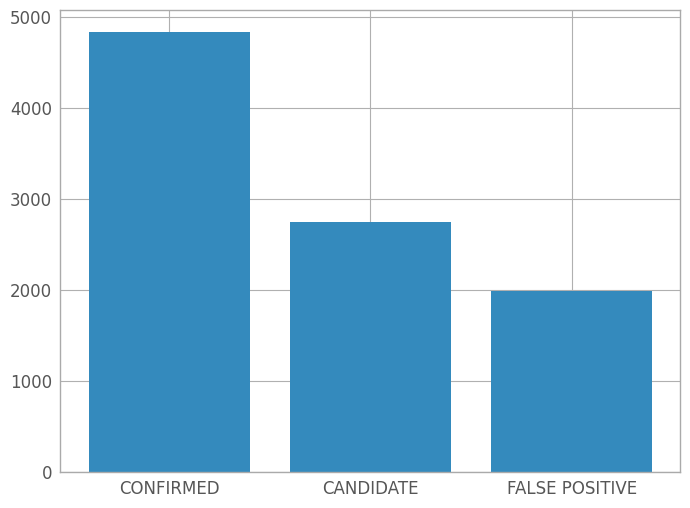

In [22]:
classes=kepler.koi_disposition.unique()
counts = kepler.koi_disposition.value_counts().to_list()
plt.bar(classes,counts)
print(kepler.koi_disposition.value_counts())

In [23]:
# Dropping rows with more than 80% data missing
kepler = kepler.dropna(thresh=len(kepler) * .80, axis=1)
kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   koi_disposition    9564 non-null   object 
 3   koi_vet_stat       9564 non-null   object 
 4   koi_vet_date       9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_disp_prov      9564 non-null   object 
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9103 non-null   float64
 13  koi_period_err2    9103 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [24]:
for column in kepler.columns:
    print(column)
    print(kepler[column].unique())

kepid
[11446443 10666592 10748390 ... 11923074 12117215 12168280]
kepoi_name
['K00001.01' 'K00002.01' 'K00003.01' ... 'K08295.01' 'K08296.01'
 'K08297.01']
koi_disposition
['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']
koi_vet_stat
['Done']
koi_vet_date
['2018-08-16']
koi_pdisposition
['CANDIDATE' 'FALSE POSITIVE']
koi_fpflag_nt
[  0   1 465]
koi_fpflag_ss
[0 1]
koi_fpflag_co
[0 1]
koi_fpflag_ec
[0 1]
koi_disp_prov
['q1_q17_dr25_sup_koi']
koi_period
[  2.47061338   2.20473542   4.88780308 ...   1.75647084 272.54288087
 229.957537  ]
koi_period_err1
[2.700e-08 4.300e-08 4.660e-07 ... 2.276e-02 3.684e-03 6.728e-03]
koi_period_err2
[-2.700e-08 -4.300e-08 -4.660e-07 ... -2.276e-02 -3.684e-03 -6.728e-03]
koi_time0bk
[122.763305  121.3585417 124.8130808 ... 132.02757   349.7527344
 326.0184   ]
koi_time0bk_err1
[8.70e-06 1.60e-05 7.51e-05 ... 6.48e-02 6.43e-02 6.23e-02]
koi_time0bk_err2
[-8.70e-06 -1.60e-05 -7.51e-05 ... -6.48e-02 -6.43e-02 -6.23e-02]
koi_time0
[2454955.763 2454954.359 2454957.8

In [25]:
kepler.drop(['kepid','kepoi_name','koi_vet_stat','koi_vet_date','koi_disp_prov','koi_pdisposition','koi_datalink_dvr',
                      'koi_parm_prov','koi_tce_delivname'], inplace=True, axis=1)

In [26]:
kepler.dropna(inplace=True)
kepler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8515 entries, 0 to 9563
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   8515 non-null   object 
 1   koi_fpflag_nt     8515 non-null   int64  
 2   koi_fpflag_ss     8515 non-null   int64  
 3   koi_fpflag_co     8515 non-null   int64  
 4   koi_fpflag_ec     8515 non-null   int64  
 5   koi_period        8515 non-null   float64
 6   koi_period_err1   8515 non-null   float64
 7   koi_period_err2   8515 non-null   float64
 8   koi_time0bk       8515 non-null   float64
 9   koi_time0bk_err1  8515 non-null   float64
 10  koi_time0bk_err2  8515 non-null   float64
 11  koi_time0         8515 non-null   float64
 12  koi_time0_err1    8515 non-null   float64
 13  koi_time0_err2    8515 non-null   float64
 14  koi_count         8515 non-null   int64  
 15  ra                8515 non-null   float64
 16  dec               8515 non-null   float64


# Label encoding

In [27]:
le = LabelEncoder()

In [28]:
kepler['koi_disposition'] = le.fit_transform(kepler['koi_disposition'])

In [29]:
keplerX= kepler.drop(['koi_disposition'],axis=1)
keplerY = kepler['koi_disposition']

# Dimension Reduction

In [30]:
pca = PCA(n_components=0.95)

In [31]:
# fit and transform data
X_train = pca.fit_transform(X_train)
X_train.shape

(29, 26)

In [32]:
X_test = pca.transform(X_test)
X_test.shape

(7, 26)

pca = PCA(n_components=15)
keplerX = pca.fit_transform(keplerX)
keplerX.shape

In [33]:
sc = StandardScaler()
keplerX = sc.fit_transform(keplerX)
keplerX.shape

(8515, 24)

# Class Balancing

In [34]:
oversample = SMOTE()
keplerX, keplerY = oversample.fit_resample(keplerX, keplerY)

Class=1, n=4124 (33.333%)
Class=0, n=4124 (33.333%)
Class=2, n=4124 (33.333%)


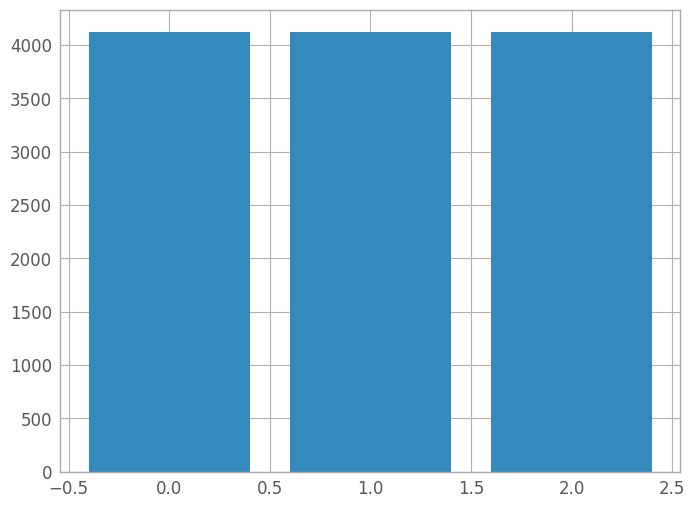

In [35]:
counter = Counter(keplerY)
for k,v in counter.items():
    per = v / len(keplerY) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

# Astropy

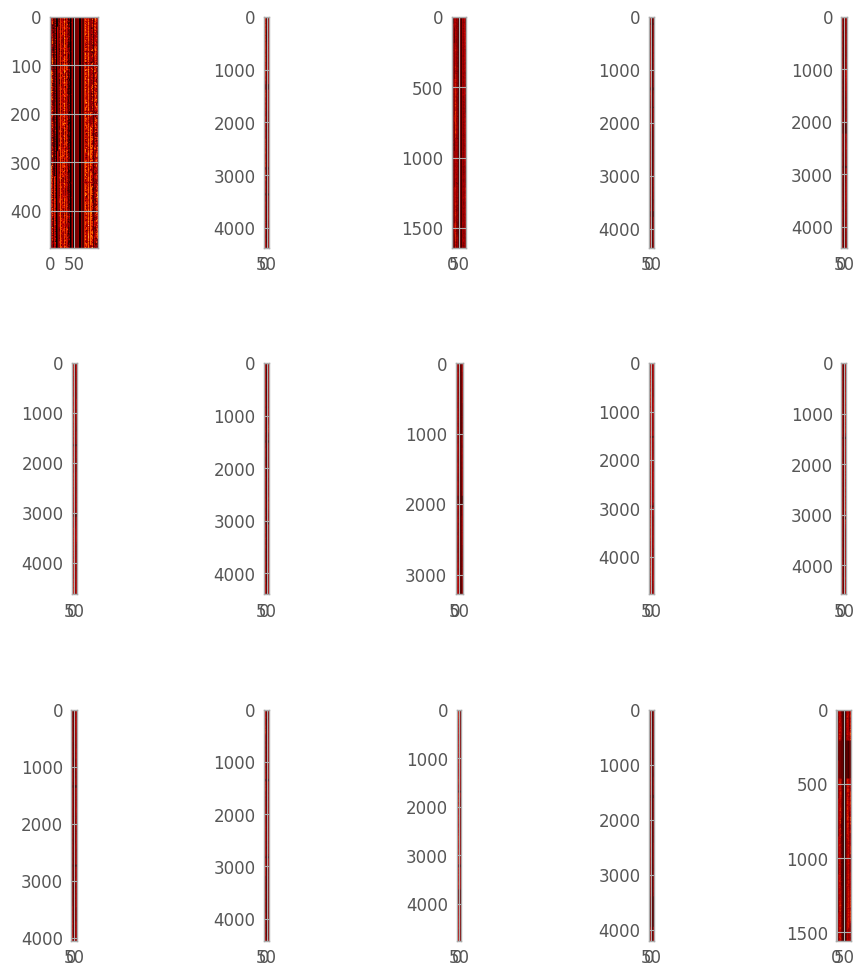

In [36]:
_, axs = plt.subplots(3, 5, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(exoTrain, axs):
    image = Image.open(img)
    ax.imshow(image)
plt.show()

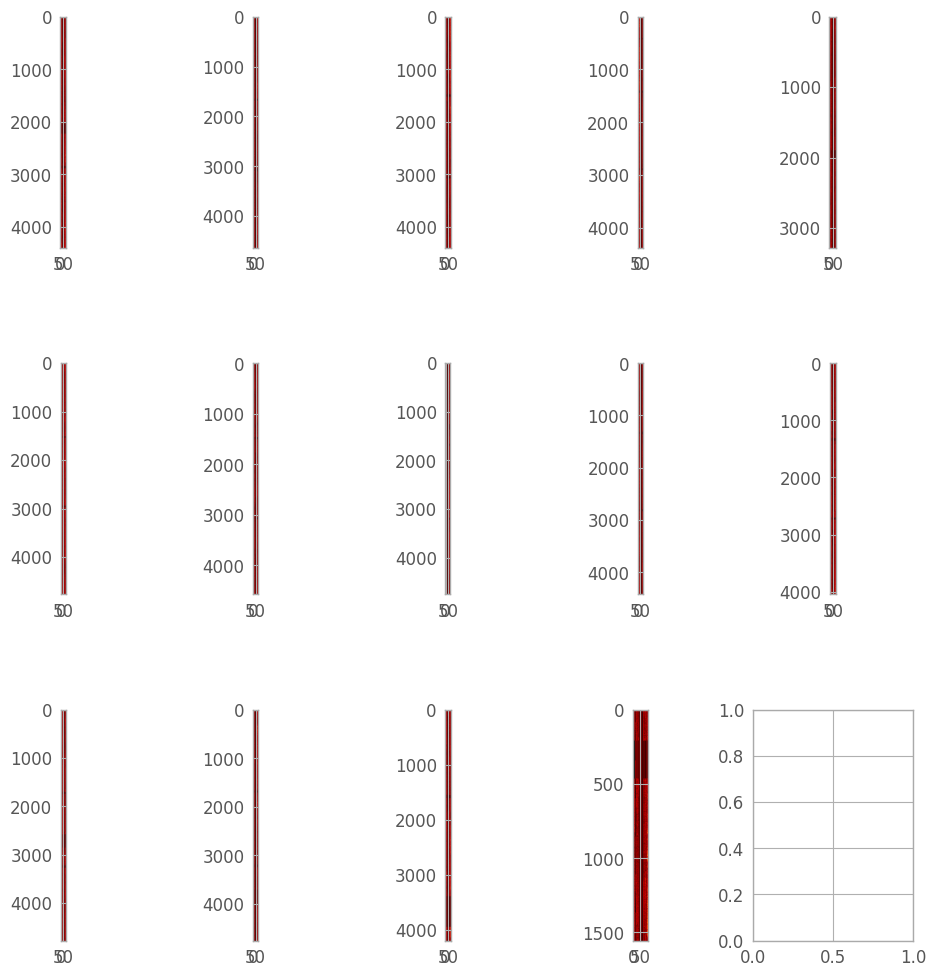

In [37]:
_, axs = plt.subplots(3, 5, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(fpTrain, axs):
    image = Image.open(img)
    ax.imshow(image)
plt.show()

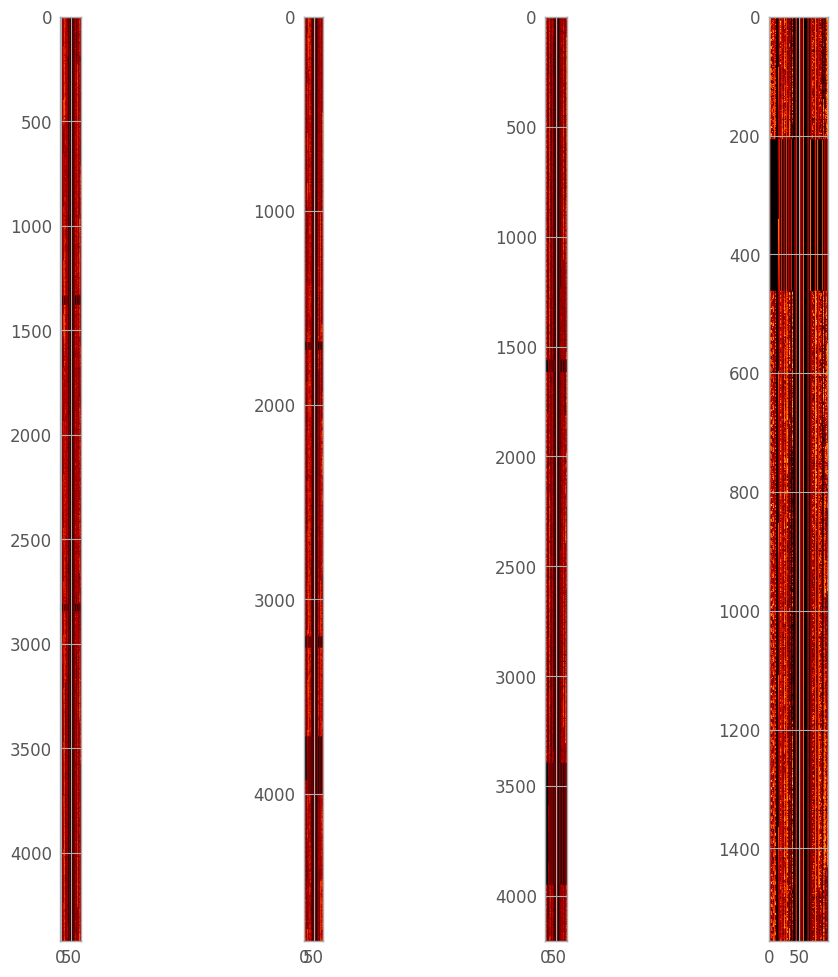

In [38]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(epTest, axs):
    image = Image.open(img)
    ax.imshow(image)
plt.show()

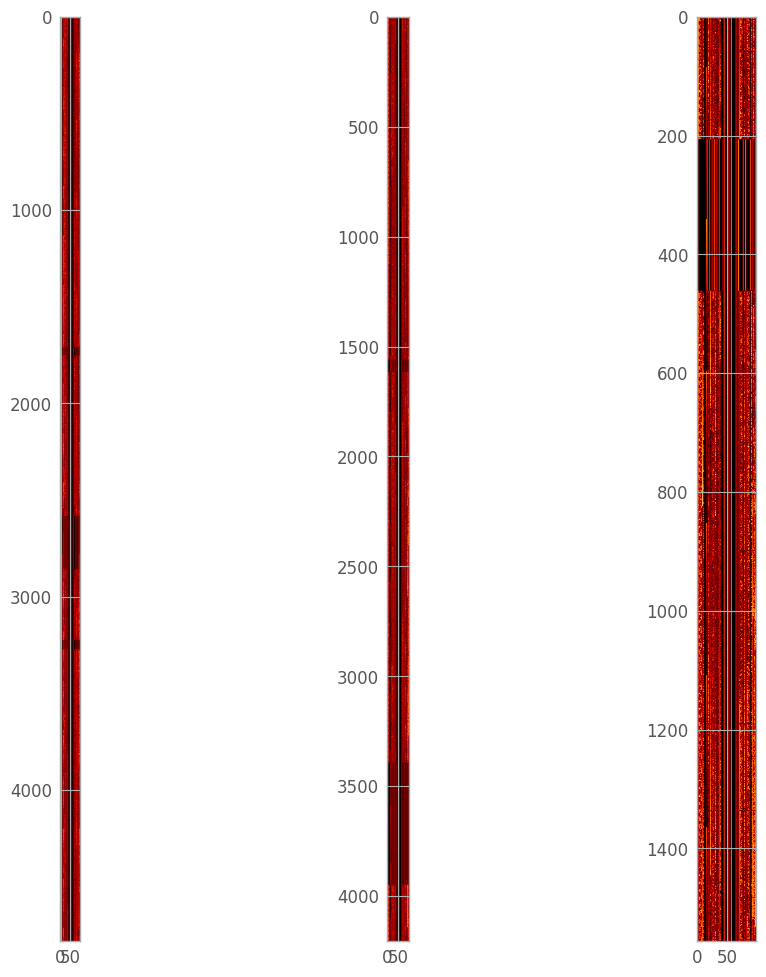

In [39]:
_, axs = plt.subplots(1, 3, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(fpTest, axs):
    image = Image.open(img)
    ax.imshow(image)
plt.show()

In [40]:
confirmedExoFits = glob.glob("/content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/*.fits")
print ("Total of %d  images." % len(confirmedExoFits))
print ('the filenames:\n')
print("\n".join(confirmedExoFits[:5]))

Total of 15  images.
the filenames:

/content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2009131105131_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2009166043257_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2009259160929_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2009350155506_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2010078095331_llc.fits


In [41]:
fpExoFits = glob.glob("/content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/*.fits")
print ("Total of %d  images." % len(fpExoFits))
print ('the filenames:\n')
print("\n".join(fpExoFits[:5]))

Total of 14  images.
the filenames:

/content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2010078095331_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2010174085026_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2010265121752_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2010355172524_llc.fits
/content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2011073133259_llc.fits


In [42]:
for file in confirmedExoFits:
    hdul = fits.open(file)
    hdul.info()

Filename: /content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2009131105131_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   476R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (8, 9)   int32   
Filename: /content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2009166043257_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   1639R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (8, 8)   int32   
Filename: /content/drive/MyDrive/exoplanet/rawdata/confirmedExoplanets/010874614/kplr010874614-2009259160929_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format

In [43]:
for file in fpExoFits:
    hdul = fits.open(file)
    hdul.info()

Filename: /content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2010078095331_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4397R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   
Filename: /content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2010174085026_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4634R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   
Filename: /content/drive/MyDrive/exoplanet/rawdata/falsePositiveExoplanets/000892772/kplr000892772-2010265121752_llc.fits
No.    Name      Ver    Type      Cards   Dimens

# **Data Augmentation**

In [44]:
gen = ImageDataGenerator(rescale=1./255)
train = gen.flow_from_directory(directory=TRAIN_DIR, target_size=(224,224))

Found 29 images belonging to 2 classes.


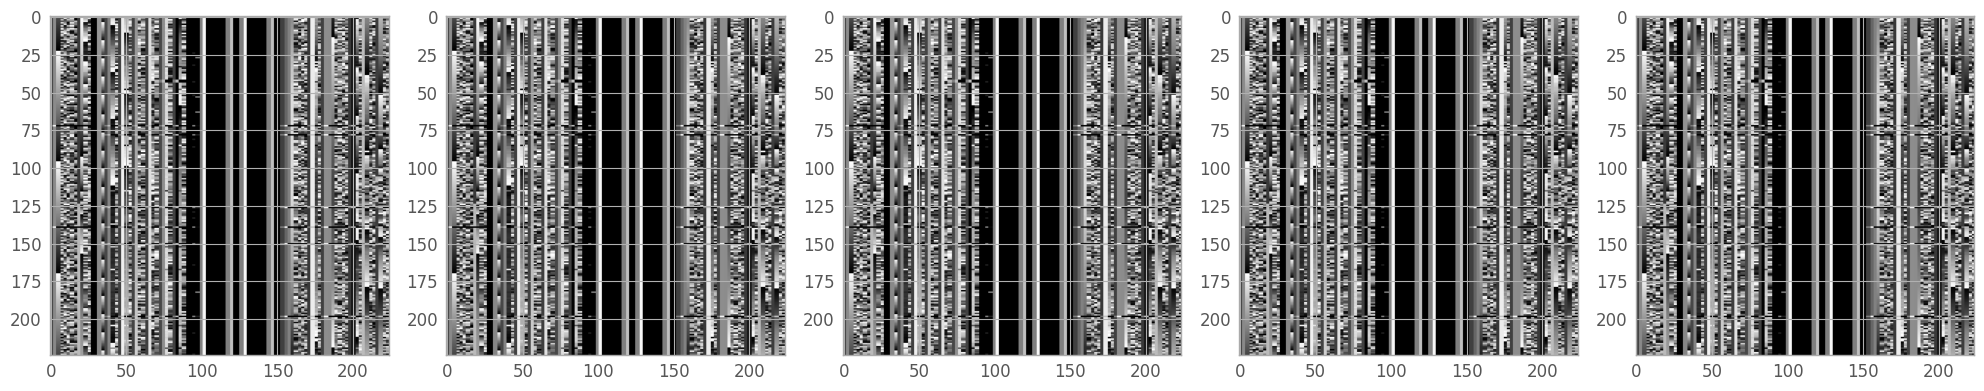

In [45]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [46]:
gen = ImageDataGenerator(rescale=1./255)
test = gen.flow_from_directory(directory=TEST_DIR, target_size=(224,224))

Found 7 images belonging to 2 classes.


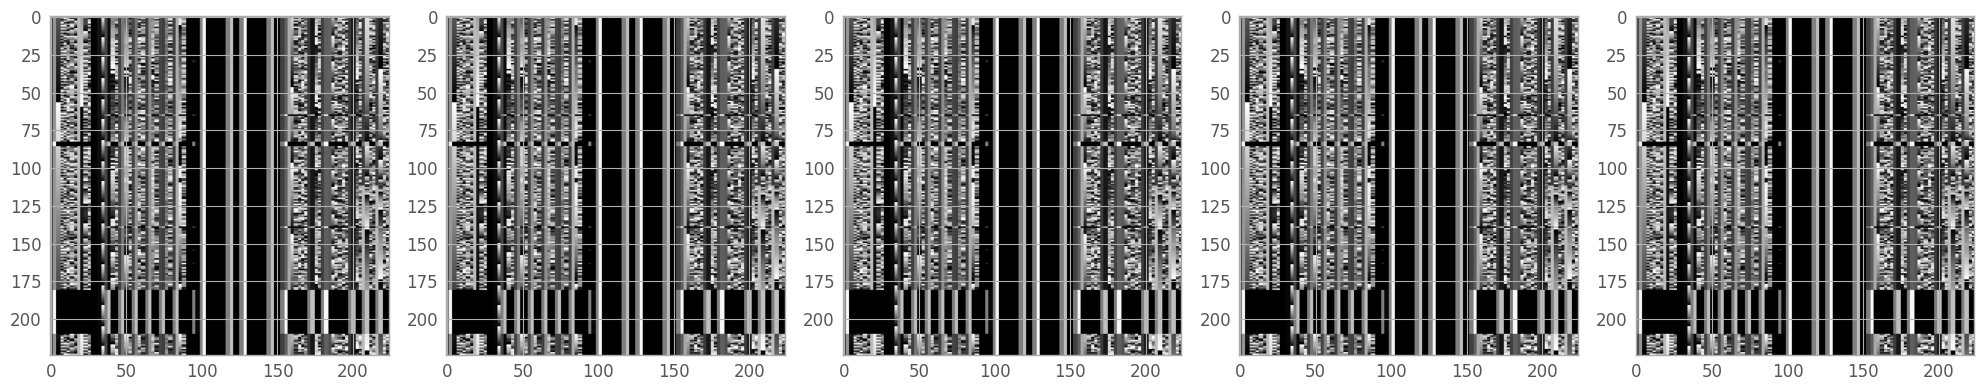

In [47]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [test[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [48]:
gen = ImageDataGenerator()
train = gen.flow_from_directory(directory=TRAIN_DIR, target_size=(224,224))
test = gen.flow_from_directory(directory=TEST_DIR, target_size=(224,224))

Found 29 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [49]:
modelScores=pd.DataFrame()

# **CNN**

In [50]:
cnnmodel = Sequential()
cnnmodel.add(Conv2D(input_shape = (224, 224, 3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
cnnmodel.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
cnnmodel.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(units = 2, activation = "sigmoid"))
opt = Adam(learning_rate = 0.001)
cnnmodel.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy,   metrics = ['accuracy'])
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 802816)            0         
                                                                 
 dense (Dense)               (None, 2)                 1605634   
                                                                 
Total params: 1,644,354
Trainable params: 1,644,354
Non-trainable params: 0
______________________________________________

In [51]:
history = cnnmodel.fit(train, validation_data= test, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 8.7850 - accuracy: 0.4138 - val_loss: 4668.8159 - val_accuracy: 0.5714
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 5326.0527 - accuracy: 0.5172 - val_loss: 174.0812 - val_accuracy: 0.7143
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 43.6443 - accuracy: 0.8621 - val_loss: 2415.5276 - val_accuracy: 0.4286
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 1992.4404 - accuracy: 0.4828 - val_loss: 1347.0369 - val_accuracy: 0.4286
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 1048.4016 - accuracy: 0.4828 - val_loss: 42.1383 - val_accuracy: 0.8571


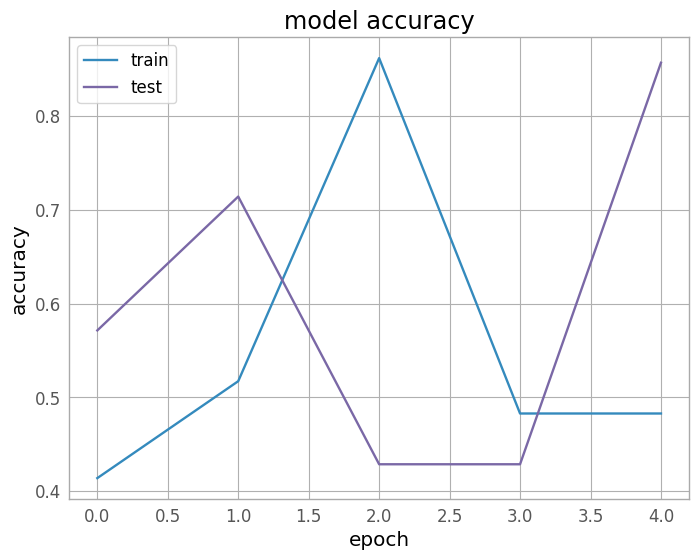

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

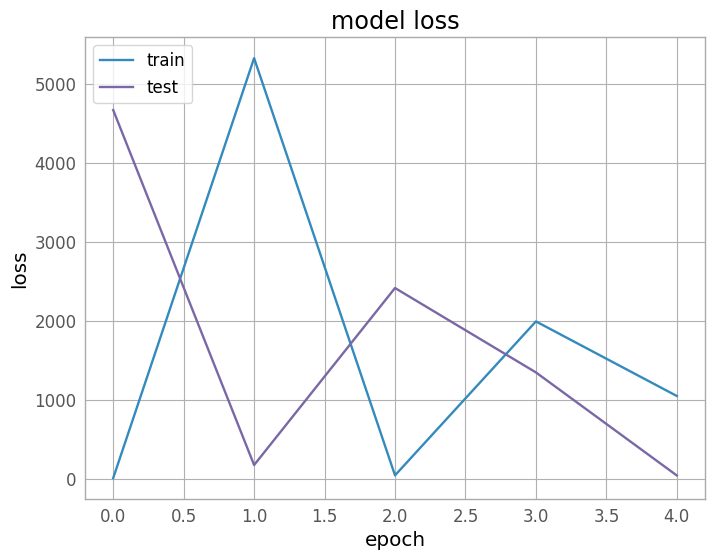

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
loss, accuracy = cnnmodel.evaluate(test, verbose=2)
print("Loss = ", loss)
accuracy= accuracy*100
print("Accuracy = ", accuracy)

1/1 - 0s - loss: 42.1383 - accuracy: 0.8571 - 138ms/epoch - 138ms/step
Loss =  42.13825225830078
Accuracy =  85.71428656578064


In [55]:
modelScores=modelScores.append([['CNN Image', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287


# VGG16

In [56]:
model = VGG16(include_top=False,  weights='imagenet',  input_shape=(224, 224, 3))
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [57]:
vgg16 = model.output
vgg16 = Flatten()(vgg16)
vgg16 = Dense(4096, activation='relu')(vgg16)
vgg16 = Dense(1072, activation='relu')(vgg16)
vgg16 = Dropout(0.2)(vgg16)
output_layer = Dense(2, activation='softmax')(vgg16)
model = Model(inputs=model.input, outputs=output_layer)
opt = Adam(learning_rate = 0.001)

model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy,   metrics = ['accuracy'])

In [58]:
history = model.fit(train, validation_data= test, epochs=5)

Epoch 1/5
1/1 [==============================] - 10s 10s/step - loss: 13.8509 - accuracy: 0.5172 - val_loss: 4759.2471 - val_accuracy: 0.4286
Epoch 2/5
1/1 [==============================] - 7s 7s/step - loss: 4274.1831 - accuracy: 0.4828 - val_loss: 91.2506 - val_accuracy: 0.4286
Epoch 3/5
1/1 [==============================] - 7s 7s/step - loss: 82.3660 - accuracy: 0.4828 - val_loss: 20.1702 - val_accuracy: 0.4286
Epoch 4/5
1/1 [==============================] - 7s 7s/step - loss: 18.4339 - accuracy: 0.4828 - val_loss: 113.7924 - val_accuracy: 0.5714
Epoch 5/5
1/1 [==============================] - 7s 7s/step - loss: 128.8833 - accuracy: 0.5172 - val_loss: 0.8257 - val_accuracy: 0.5714


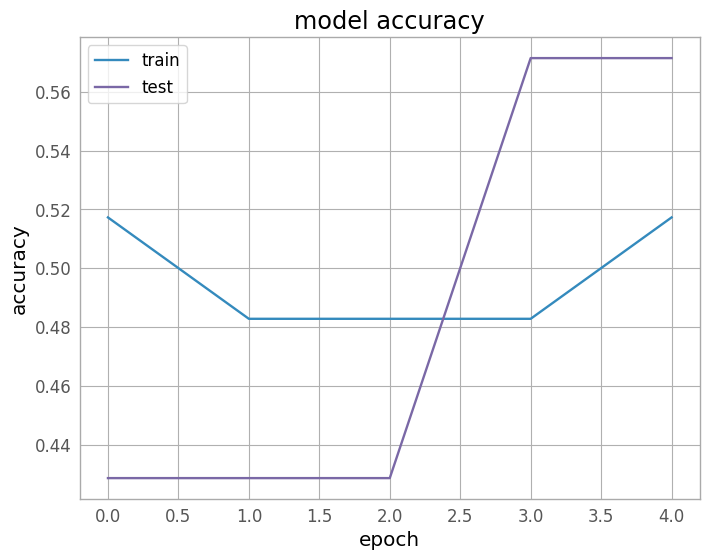

In [59]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

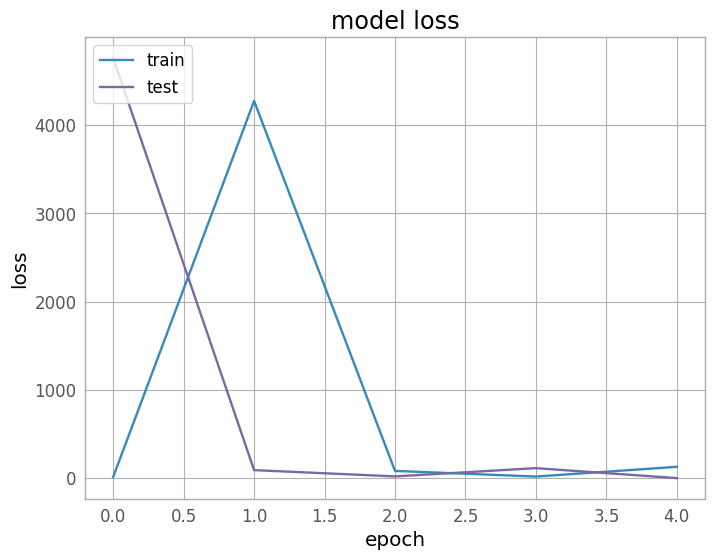

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
loss, accuracy = model.evaluate(test, verbose=2)
print("Loss = ", loss)
accuracy= accuracy*100
print("Accuracy = ", accuracy)

1/1 - 0s - loss: 0.8257 - accuracy: 0.5714 - 337ms/epoch - 337ms/step
Loss =  0.8256927132606506
Accuracy =  57.14285969734192


In [62]:
modelScores=modelScores.append([['VGG16 Image', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860


# VGG19

In [63]:
model = VGG19(include_top=False,  weights='imagenet',  input_shape=(224, 224, 3))
print(model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [64]:
vgg19 = model.output
vgg19 = Flatten()(vgg19)
vgg19 = Dense(1032, activation='relu')(vgg19)
vgg19 = Dropout(0.2)(vgg19)
output_layer = Dense(2, activation='softmax')(vgg19)
model = Model(inputs=model.input, outputs=output_layer)
opt = Adam(learning_rate = 0.001)

model.compile(optimizer = opt, loss= keras.losses.categorical_crossentropy,   metrics = ['accuracy'])

In [65]:
history = model.fit(train,steps_per_epoch=10, validation_data= test, validation_steps=5, epochs=5)

Epoch 1/5
 1/10 [==>...........................] - ETA: 1:32 - loss: 6.6169 - accuracy: 0.6207

10/10 [==============================] - 11s 89ms/step - loss: 6.6169 - accuracy: 0.6207 - val_loss: 64033.2930 - val_accuracy: 0.4286


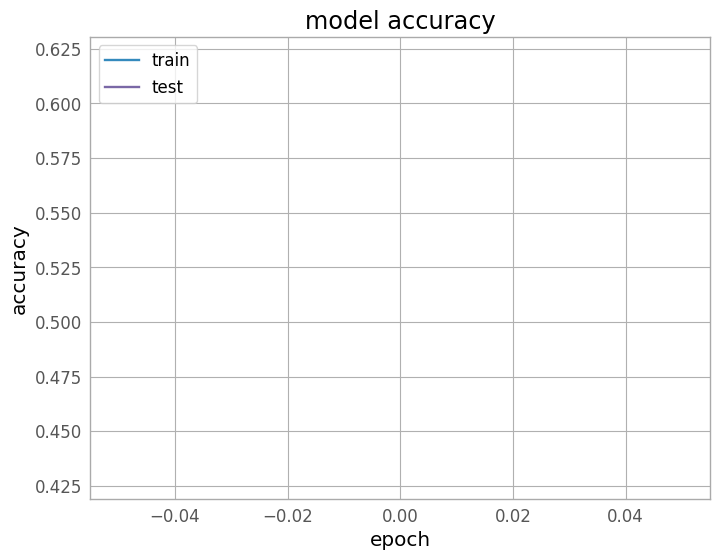

In [66]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

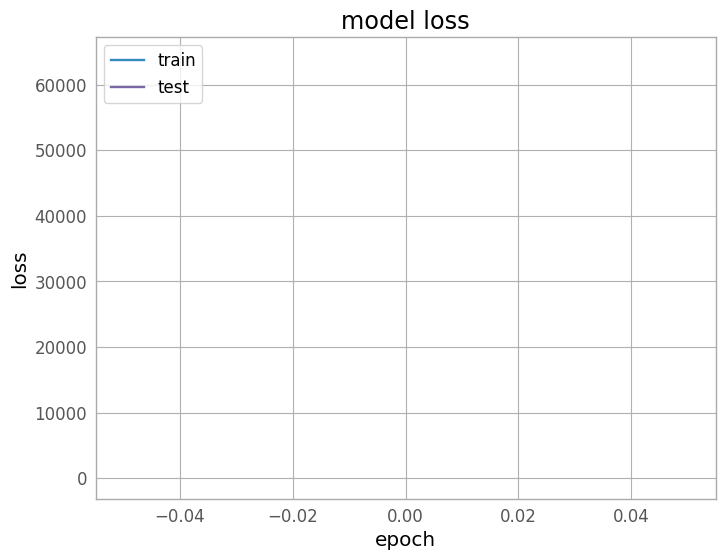

In [67]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
loss, accuracy = model.evaluate(test, verbose=2)
print("Loss = ", loss)
accuracy= accuracy*100
print("Accuracy = ", accuracy)

1/1 - 0s - loss: 64033.2891 - accuracy: 0.4286 - 387ms/epoch - 387ms/step
Loss =  64033.2890625
Accuracy =  42.85714328289032


In [69]:
modelScores=modelScores.append([['VGG19 Image', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143


# SVM

In [70]:
svm = SVC(kernel='rbf', C=0.1, gamma=5)

In [71]:
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=5)

In [72]:
pred = svm.predict(X_test)

In [73]:
accuracy= np.round(accuracy_score(y_test, pred)*100,0)
print("Accuracy = ", accuracy)

Accuracy =  57.0


In [74]:
modelScores=modelScores.append([['SVM Image', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143
0,SVM Image,57.000000


# KNN

In [75]:
knn = KNeighborsClassifier(n_neighbors=2)

In [76]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [77]:
pred = knn.predict(X_test)

In [78]:
accuracy= np.round(accuracy_score(y_test, pred)*100,0)
print("Accuracy = ", accuracy)

Accuracy =  71.0


In [79]:
modelScores=modelScores.append([['KNN Image', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143
0,SVM Image,57.000000
0,KNN Image,71.000000


# Decision Trees

In [80]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=100)

In [81]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=100)

In [82]:
pred = dt.predict(X_test)

In [83]:
accuracy= np.round(accuracy_score(y_test, pred)*100,0)
print("Accuracy = ", accuracy)

Accuracy =  57.0


In [84]:
modelScores=modelScores.append([['Decision Trees Image', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143
0,SVM Image,57.000000
0,KNN Image,71.000000
0,Decision Trees Image,57.000000


# Kepler Data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(keplerX, keplerY, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8660, 24), (3712, 24), (8660,), (3712,))

# **CNN**

In [86]:
xtrain = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
xtest = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
y_train = np.array(y_train)
y_test = np.array(y_test)
xtrain.shape, xtest.shape, y_train.shape, y_test.shape

((8660, 24, 1), (3712, 24, 1), (8660,), (3712,))

In [87]:
cnnmodel = Sequential()
cnnmodel.add(Conv1D(input_shape = (xtrain.shape[1],1), filters = 256, kernel_size = 3, padding = "same", activation = "tanh"))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(units = 256, activation = "tanh"))
cnnmodel.add(Dense(units = 128, activation = "tanh"))
cnnmodel.add(Dense(units = 4, activation = "sigmoid"))
cnnmodel.compile(optimizer = 'adam', loss= keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 256)           1024      
                                                                 
 flatten_3 (Flatten)         (None, 6144)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1573120   
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,607,556
Trainable params: 1,607,556
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = cnnmodel.fit(xtrain, y_train, validation_data= (xtest, y_test), epochs=20)

Epoch 1/20
271/271 [==============================] - 3s 9ms/step - loss: 0.5231 - accuracy: 0.7726 - val_loss: 0.4023 - val_accuracy: 0.8332
Epoch 2/20
271/271 [==============================] - 2s 7ms/step - loss: 0.3780 - accuracy: 0.8338 - val_loss: 0.3526 - val_accuracy: 0.8491
Epoch 3/20
271/271 [==============================] - 2s 7ms/step - loss: 0.3336 - accuracy: 0.8513 - val_loss: 0.3408 - val_accuracy: 0.8357
Epoch 4/20
271/271 [==============================] - 2s 7ms/step - loss: 0.3257 - accuracy: 0.8514 - val_loss: 0.3271 - val_accuracy: 0.8596
Epoch 5/20
271/271 [==============================] - 2s 7ms/step - loss: 0.3075 - accuracy: 0.8640 - val_loss: 0.3277 - val_accuracy: 0.8537
Epoch 6/20
271/271 [==============================] - 2s 7ms/step - loss: 0.3036 - accuracy: 0.8620 - val_loss: 0.3159 - val_accuracy: 0.8621
Epoch 7/20
271/271 [==============================] - 2s 7ms/step - loss: 0.2893 - accuracy: 0.8691 - val_loss: 0.3191 - val_accuracy: 0.8607
Epoch 

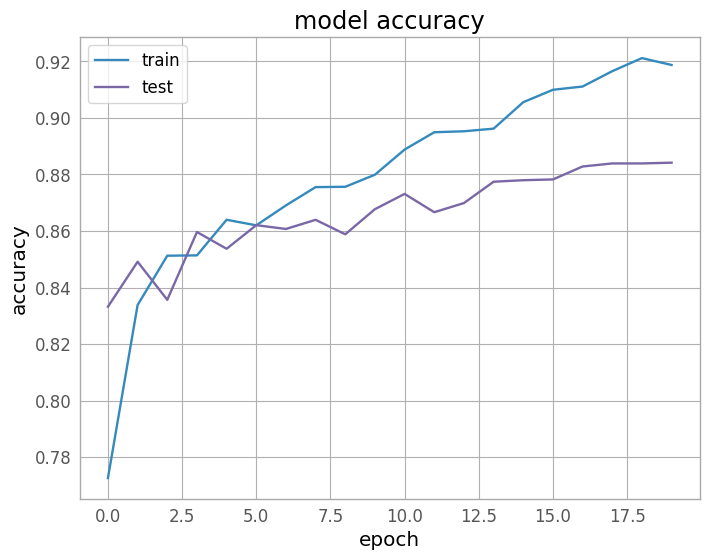

In [89]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

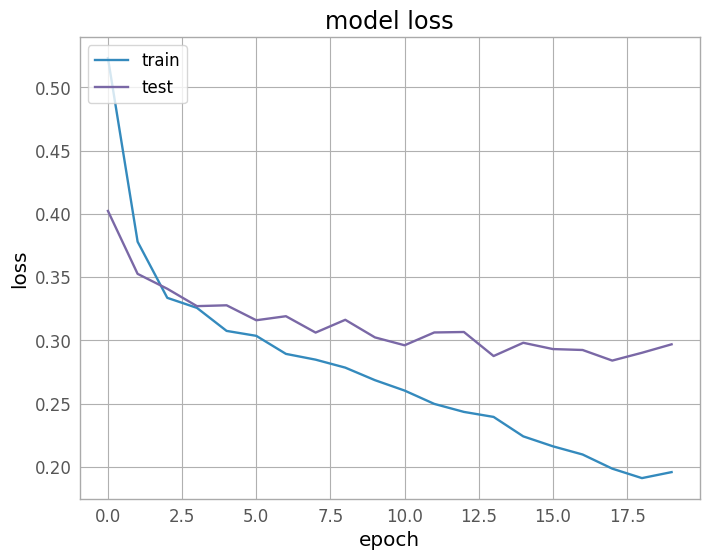

In [90]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
loss, accuracy = cnnmodel.evaluate(xtest, y_test, verbose=2)
print("Loss = ", loss)
accuracy= accuracy*100
print("Accuracy = ", accuracy)

116/116 - 0s - loss: 0.2969 - accuracy: 0.8842 - 241ms/epoch - 2ms/step
Loss =  0.2968772351741791
Accuracy =  88.4159505367279


In [92]:
modelScores=modelScores.append([['CNN Kepler', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143
0,SVM Image,57.000000
0,KNN Image,71.000000
0,Decision Trees Image,57.000000
0,CNN Kepler,88.415951


# SVM

In [93]:
svm = SVC(kernel='rbf', C=0.1, gamma=5)

In [94]:
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=5)

In [95]:
pred = svm.predict(X_test)

In [96]:
accuracy= np.round(accuracy_score(y_test, pred)*100,0)
print("Accuracy = ", accuracy)

Accuracy =  33.0


In [97]:
modelScores=modelScores.append([['SVM Kepler', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143
0,SVM Image,57.000000
0,KNN Image,71.000000
0,Decision Trees Image,57.000000
0,CNN Kepler,88.415951
0,SVM Kepler,33.000000


# KNN

In [98]:
knn = KNeighborsClassifier(n_neighbors=2)

In [99]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [100]:
pred = knn.predict(X_test)

In [101]:
accuracy= np.round(accuracy_score(y_test, pred)*100,0)
print("Accuracy = ", accuracy)

Accuracy =  85.0


In [102]:
modelScores=modelScores.append([['KNN Kepler', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143
0,SVM Image,57.000000
0,KNN Image,71.000000
0,Decision Trees Image,57.000000
0,CNN Kepler,88.415951
0,SVM Kepler,33.000000
0,KNN Kepler,85.000000


# Decision Trees

In [103]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=100)

In [104]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=100)

In [105]:
pred = dt.predict(X_test)

In [106]:
accuracy= np.round(accuracy_score(y_test, pred)*100,0)
print("Accuracy = ", accuracy)

Accuracy =  86.0


In [107]:
modelScores=modelScores.append([['Decision Trees Kepler', accuracy]])
modelScores

,0,1
0,CNN Image,85.714287
0,VGG16 Image,57.142860
0,VGG19 Image,42.857143
0,SVM Image,57.000000
0,KNN Image,71.000000
0,Decision Trees Image,57.000000
0,CNN Kepler,88.415951
0,SVM Kepler,33.000000
0,KNN Kepler,85.000000
0,Decision Trees Kepler,86.000000


# Comparitive Analysis

In [108]:
modelScores.columns = ['Model', 'Accuracy']
modelScores.sort_values(by= 'Accuracy', ascending=False)

,Model,Accuracy
0,CNN Kepler,88.415951
0,Decision Trees Kepler,86.000000
0,CNN Image,85.714287
0,KNN Kepler,85.000000
0,KNN Image,71.000000
0,VGG16 Image,57.142860
0,SVM Image,57.000000
0,Decision Trees Image,57.000000
0,VGG19 Image,42.857143
0,SVM Kepler,33.000000


Text(0, 0.5, 'Accuracy Scores')

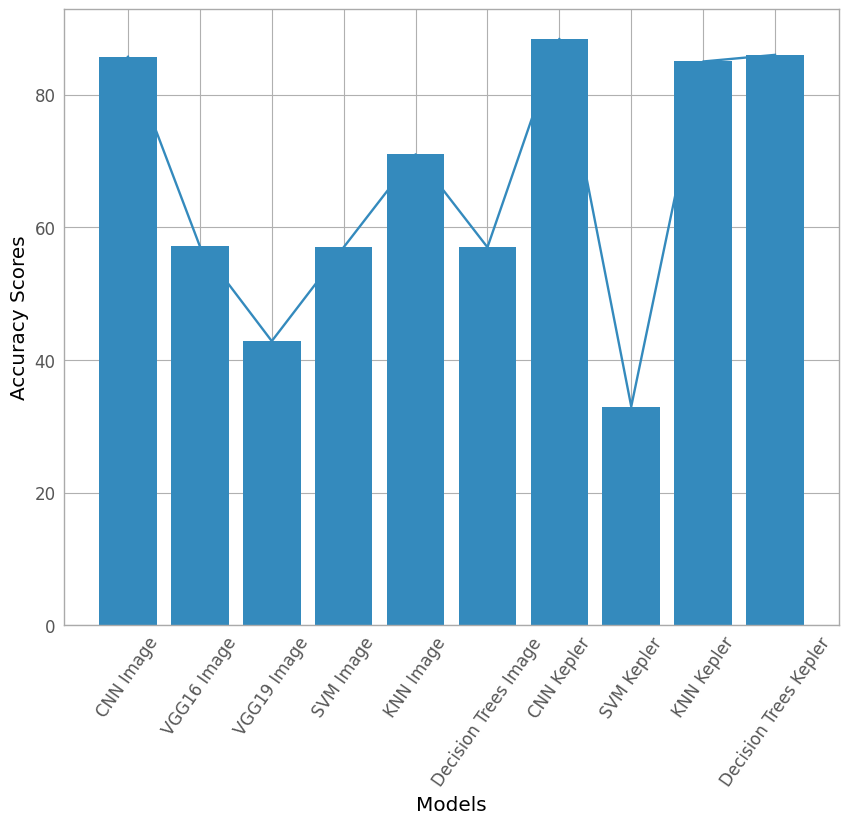

In [109]:
plt.figure(figsize=(10,8))
plt.plot(modelScores['Model'], modelScores['Accuracy'])
plt.bar(modelScores['Model'], modelScores['Accuracy'])
plt.xticks(rotation=55)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')